# 1. Data Set Overview

- data source: https://tianchi.aliyun.com/dataset/dataDetail?dataId=649#1

- The data set is about 1 million users who have behaviors including click, purchase, adding item to shopping cart and item favoring during November 25 to December 03, 2017.

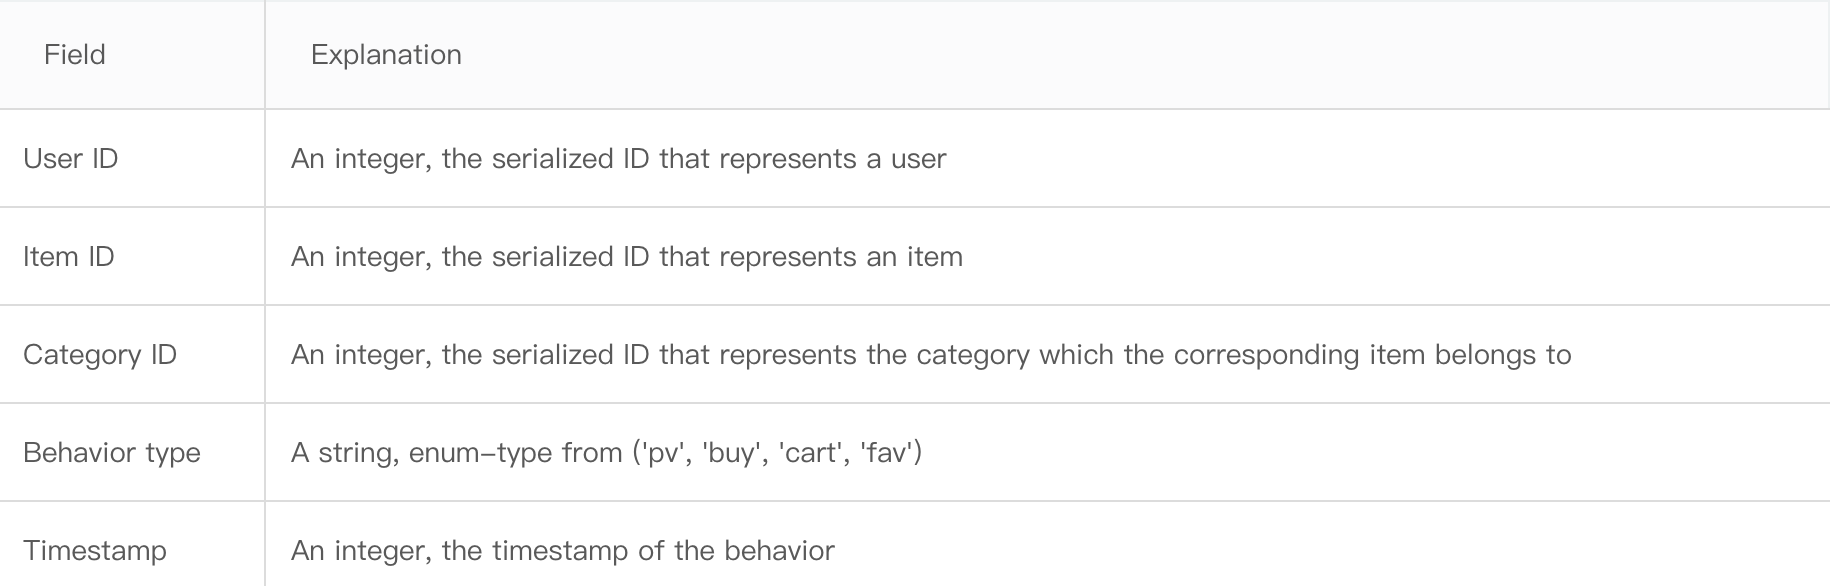

- There are 4 types of Behavior type

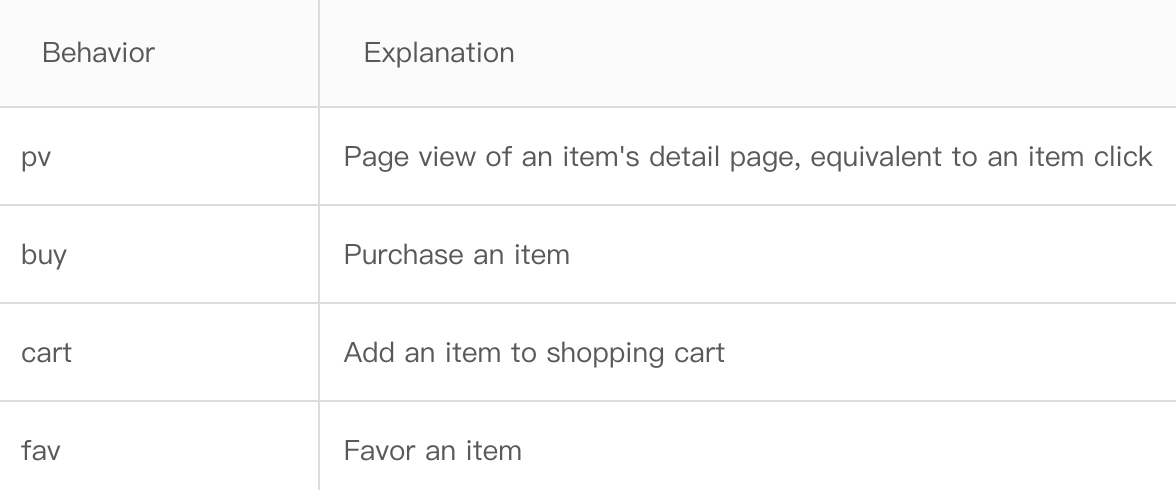

# 2. Problem Define

## 2.1 用户流量整体情况分析
1. 分析用户行为时间分布，得出用户最活跃的日期和时间段。
2. 计算PV，UV，跳失率等指标，了解用户基本行为以及网站流量情况。

## 2.2 用户行为分析
1. 对点击，购买，加入购物车（加购），收藏四类行为进行分析。
2. 将用户成交方式分为：点击——购买，点击——收藏——购买，点击——加购——购买，点击——收藏&加购——购买四种类型。分别进行漏斗分析。

## 2.3 商品情况分析
1. 不同日期的成交量
2. 复购率分析
3. 热门商品分析：
    1. 点击、收藏、加购、购买量分别的前十。利用韦恩图进行分析。

## 2.4 RFM分析
1. 数据足够的话应该再根据不同用户年龄进行细分。如阿里八大策略人群：新锐白领、资深中产、精致妈妈、小镇青年、Gen Z（Z世代）、都市银发、小镇中老年和都市蓝领。

# Read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('UserBehavior.csv',
                 header=None,
                 names=['User ID','Item ID','Category ID','Behavior type','Timestamp'],
                 parse_dates=['Timestamp']
                 )

# 4.Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   User ID        int64 
 1   Item ID        int64 
 2   Category ID    int64 
 3   Behavior type  object
 4   Timestamp      object
dtypes: int64(3), object(2)
memory usage: 3.7+ GB


In [5]:
#因为都是ID，所以没有什么意义
df.describe()

,User ID,Item ID,Category ID
count,1.001508e+08,1.001508e+08,1.001508e+08
mean,5.069431e+05,2.579775e+06,2.696380e+06
std,2.940605e+05,1.488056e+06,1.463155e+06
min,1.000000e+00,1.000000e+00,8.000000e+01
25%,2.524290e+05,1.295225e+06,1.320293e+06
50%,5.040150e+05,2.580735e+06,2.671397e+06
75%,7.609490e+05,3.862042e+06,4.145813e+06
max,1.018011e+06,5.163070e+06,5.162429e+06


In [6]:
#df.columns=['User ID','Item ID','Category ID','Behavior type','Timestamp']

In [7]:
df.head()

,User ID,Item ID,Category ID,Behavior type,Timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [8]:
df.nunique()

User ID           987994
Item ID          4162024
Category ID         9439
Behavior type          4
Timestamp         815859
dtype: int64

In [9]:
#检查是否有缺失值，全为False则为无
df.isnull().any()

User ID          False
Item ID          False
Category ID      False
Behavior type    False
Timestamp        False
dtype: bool

In [10]:
#加上copy()防止SettingWithCopyWarning出现，因为这是链式索引，强制创建一个副本可以保持逻辑严密。
df_small = df[df['User ID']<=100000].copy()
df_small

,User ID,Item ID,Category ID,Behavior type,Timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146
...,...,...,...,...,...
100150449,99999,1309907,2939262,pv,1512137410
100150450,99999,3900086,3738615,pv,1512137523
100150451,99999,4804351,4022701,pv,1512137578
100150452,99999,3325832,2926020,pv,1512180193


In [11]:
df_small.head()

,User ID,Item ID,Category ID,Behavior type,Timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [12]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9901384 entries, 0 to 100150453
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   User ID        int64 
 1   Item ID        int64 
 2   Category ID    int64 
 3   Behavior type  object
 4   Timestamp      object
dtypes: int64(3), object(2)
memory usage: 453.2+ MB


# 5. Data Cleaning

In [13]:
#df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s').apply(lambda x: x.date())
#将timestamp转换成精确到秒的时间
df_small['Date_time'] = pd.to_datetime(pd.to_numeric(df_small['Timestamp']),unit='s',origin=pd.Timestamp('1970-01-01 08:00:00'))
#添加独立的日期和时间
df_small['Date'] =df_small['Date_time'].dt.date
df_small['Time'] =df_small['Date_time'].dt.time
df_small['Hour'] =df_small['Date_time'].dt.hour

In [14]:
#检验数据
df_small.head()

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10,2017-11-25,01:21:10,1
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,2017-11-25,06:15:33,6
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,2017-11-25,09:21:25,9
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,2017-11-25,15:04:53,15
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,2017-11-25,15:49:06,15


In [15]:
# #重命名列名
# df = df.rename(columns={'Timestamp':'Date_time'})
# df

In [16]:
#可以返回行数
# len(df[df['Behavior type']=='buy'])

In [17]:
#查看是否有缺失值
df_small.isnull().any()

User ID          False
Item ID          False
Category ID      False
Behavior type    False
Timestamp        False
Date_time        False
Date             False
Time             False
Hour             False
dtype: bool

In [18]:
#查看日期有没有异常值
df_small['Date'].value_counts()

2017-12-02    1367243
2017-12-03    1356689
2017-12-01    1085453
2017-11-26    1050057
2017-11-30    1035215
               ...   
2017-10-15          1
2017-07-23          1
2017-11-05          1
2017-10-23          1
1919-09-19          1
Name: Date, Length: 82, dtype: int64

In [19]:
#该数据集应该只有2017年11月25日到12月3日的数据，其他的异常数据都进行删除。
df_small=df_small[(df_small['Date_time']>='2017-11-25 00:00:00') & (df_small['Date_time']<='2017-12-03 23:59:59')]
df_small['Date'].value_counts()

2017-12-02    1367243
2017-12-03    1356689
2017-12-01    1085453
2017-11-26    1050057
2017-11-30    1035215
2017-11-25    1028408
2017-11-29    1013414
2017-11-27     990841
2017-11-28     968549
Name: Date, dtype: int64

# 6. Data Analysis


## 6.1 Analysis of User Traffic
- corresponds to 2.1 用户流量整体情况分析

### 6.1.1 PV
- **PV**(Page view)for 9 days from 2017-11-25 to 2017-12-03：**8860502**

In [20]:
df_small['Behavior type'].value_counts()

pv      8860502
cart     551344
fav      288531
buy      195492
Name: Behavior type, dtype: int64

### 6.1.2 UV
- **UV**(unique visitors)for 9 days from 2017-11-25 to 2017-12-03：**96912** (number of unique user id)

In [21]:
uv = df_small['User ID'].nunique()
uv

96912

### 6.1.3 Average number of pages visited by users
- **Average number of pages visited by users** is **8860502 / 96912= 91.43**
- Which means each user visited an average of **91** pages

### 6.1.4 Bounce Rate
- **Bounce Rate**(跳失率 = only 'pv' behavior users / Total users)

In [22]:
#计算跳失的用户
#独立访客数减去有进行下一步动作的用户，按照独立的user id进行匹配
next_step = ['fav','cart','buy']
bounced_user = uv-len(df_small[df_small['Behavior type'].isin(next_step)]['User ID'].unique())
bounced_user

5668

- **Bounce Rate = 5668 / 96912 = 0.0584**
- The bounce rate is not high, which means that the product details page can attract users to go to the next step

### 6.1.5 Daily Page Visits Volume

In [23]:
#选出行为是pv的行，再筛选出behavior type这一列，之后通过groupby函数对日期进行分组，再用count()得到每日的页面浏览量。
PV_volume = df_small[df_small['Behavior type']=='pv']['Behavior type'].groupby(df_small['Date']).count()
PV_volume

Date
2017-11-25     923372
2017-11-26     940531
2017-11-27     886357
2017-11-28     866496
2017-11-29     907181
2017-11-30     926745
2017-12-01     971243
2017-12-02    1223618
2017-12-03    1214959
Name: Behavior type, dtype: int64

In [24]:
PV_volume_df = pd.DataFrame(PV_volume)
PV_volume_df

,Behavior type
Date,
2017-11-25,923372
2017-11-26,940531
2017-11-27,886357
2017-11-28,866496
2017-11-29,907181
2017-11-30,926745
2017-12-01,971243
2017-12-02,1223618
2017-12-03,1214959


In [25]:
# PV_volume_df['Behavior type']

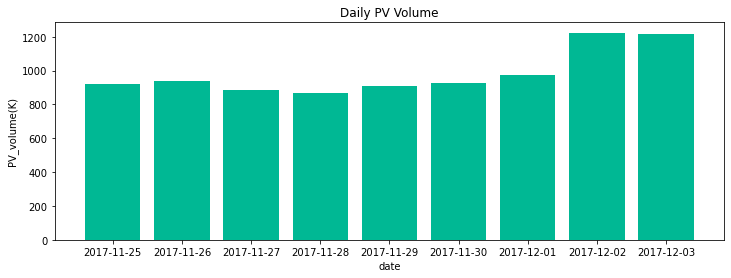

In [26]:
#visualization
plt.figure(figsize=(12, 4))

barWidth = 0.5

x = PV_volume_df.index
#防止数据量过大，y轴刻度不精确，改为以K为单位。
y = PV_volume_df['Behavior type'].div(1000)

plt.bar(x,y,color='#00b894')
plt.xlabel('date')
plt.ylabel('PV_volume(K)')
plt.title('Daily PV Volume')
plt.show()

### 6.1.6 DAU(Daily Active User)

In [27]:
df_small.head()

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour
0,1,2268318,2520377,pv,1511544070,2017-11-25 01:21:10,2017-11-25,01:21:10,1
1,1,2333346,2520771,pv,1511561733,2017-11-25 06:15:33,2017-11-25,06:15:33,6
2,1,2576651,149192,pv,1511572885,2017-11-25 09:21:25,2017-11-25,09:21:25,9
3,1,3830808,4181361,pv,1511593493,2017-11-25 15:04:53,2017-11-25,15:04:53,15
4,1,4365585,2520377,pv,1511596146,2017-11-25 15:49:06,2017-11-25,15:49:06,15


In [28]:
#对不同日期的USER ID做去重处理
DAU_all=df_small.drop_duplicates(['User ID','Date'])
DAU = DAU_all['User ID'].groupby(df_small['Date']).count()
DAU

Date
2017-11-25    68815
2017-11-26    70078
2017-11-27    69281
2017-11-28    69071
2017-11-29    70344
2017-11-30    71335
2017-12-01    72539
2017-12-02    95134
2017-12-03    94873
Name: User ID, dtype: int64

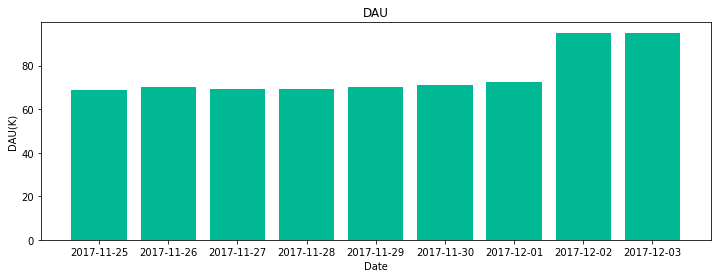

In [29]:
#visualization
plt.figure(figsize=(12, 4))

barWidth = 0.5

x = DAU.index
#y轴以K为单位
y = DAU.div(1000)

plt.bar(x,y,color='#00b894')
plt.xlabel('Date')
plt.ylabel('DAU(K)')
plt.title('DAU')
plt.show()

- Both PV and UV have more days on **December 02 and 03** than the previous days, probably because **these two days are weekends**

### 6.1.7 PV Per Hour

In [30]:
#选出行为是pv的行，再筛选出behavior type这一列，之后通过groupby函数对小时进行分组，再用count()得到每小时的页面浏览量。
PV_volume_hour = df_small[df_small['Behavior type']=='pv']['Behavior type'].groupby(df_small['Hour']).count()
PV_volume_hour

Hour
0     295558
1     132783
2      71662
3      48936
4      42795
5      54497
6     119077
7     217859
8     301489
9     369151
10    431980
11    418368
12    425740
13    466295
14    460288
15    481041
16    457487
17    418978
18    428163
19    542171
20    657600
21    746230
22    727817
23    544537
Name: Behavior type, dtype: int64

### 6.1.8 UV Per Hour

In [31]:
#根据上面已经有筛选掉的不同日期的User ID的DAU_ALL，再用groupby进行小时维度的分组，再用count计算每个小时的user
DAU_hour = DAU_all['User ID'].groupby(df_small['Hour']).count()
DAU_hour

Hour
0     50551
1     14113
2      7343
3      5334
4      4953
5      8108
6     21630
7     39475
8     48691
9     52269
10    53178
11    45752
12    43395
13    37963
14    31691
15    29134
16    26211
17    24153
18    23404
19    25083
20    26080
21    25881
22    22496
23    14582
Name: User ID, dtype: int64

### 6.1.9 PV&UV Per Hour

In [32]:
#combine PV UV together
PV_UV_Hour = pd.DataFrame({'PV':PV_volume_hour,'UV':DAU_hour},index = DAU_hour.index)
PV_UV_Hour

,PV,UV
Hour,,
0,295558,50551
1,132783,14113
2,71662,7343
3,48936,5334
4,42795,4953
5,54497,8108
6,119077,21630
7,217859,39475
8,301489,48691


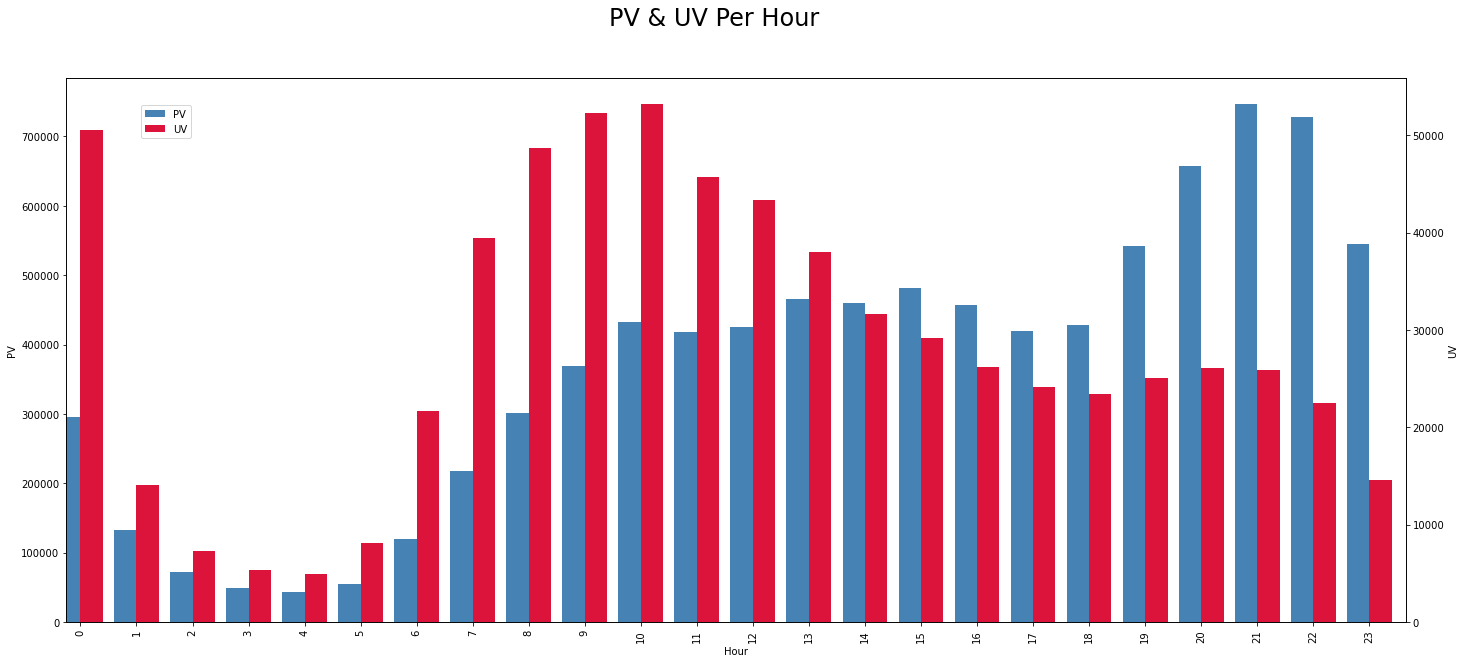

In [33]:
fig = plt.figure(figsize=(24,10))
ax = fig.add_subplot(111)
ax2 = ax.twinx()#和ax共享一个X轴的axes
#柱子宽度
width = 0.4
#postion默认0.5，取值[0,1],0.5两个则会重合在一起。
PV_UV_Hour.PV.plot(kind='bar', color='#4682B4', ax=ax, width=width, position=1)
PV_UV_Hour.UV.plot(kind='bar', color='#DC143C', ax=ax2, width=width, position=0)

ax.set_ylabel('PV')
ax2.set_ylabel('UV')
fig.suptitle('PV & UV Per Hour',fontsize=24)
#调整legend的位置
fig.legend(bbox_to_anchor=(0.2,0.85))

plt.show()

- **PV and UV are low at 1-6 o'clock**, because most users are in the sleep rest stage.
- **At 7-13 o'clock, the UV is high but the PV is not high.** It is guessed that the user gradually gets up, but there is not much time to browse.
- **At 19-23 o'clock, the PV reaches its peak**, and it is guessed that it is the free time after get off work\get out of class to browse the shopping website
- **At 0-1 o'clock, the UV is high but the PV is not high.** It is speculated that the user hasn't watched it too long before going to bed

In [34]:
#### 1. PV和UV在1-6点钟较低，大多数用户处于睡眠休息阶段。
#### 2. 在7-13点钟时，UV高但PV不高，猜测用户逐渐起床，但并没有太多时间浏览。
#### 3. 在19-22点钟时，PV达到高峰，猜测是下班\下课后的空闲时间浏览购物网站
#### 4. 在0-1点钟时，UV很高但PV并不高，推测是用户准备休息没有看太久。

### 6.1.10 Trading Volume of different hours

In [35]:
TV_hour = df_small[df_small['Behavior type']=='buy']['Behavior type'].groupby(df_small['Hour']).count()

In [36]:
TV_hour

Hour
0      5385
1      2127
2      1124
3       683
4       676
5       764
6      1716
7      3583
8      6164
9      9130
10    12602
11    11764
12    11737
13    11988
14    11895
15    11834
16    11268
17    10024
18     9508
19    11303
20    12859
21    14377
22    13545
23     9436
Name: Behavior type, dtype: int64

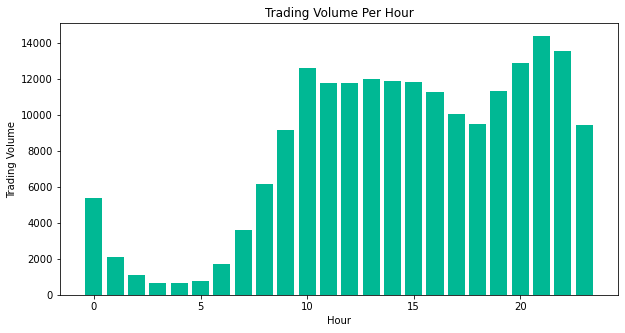

In [37]:
#visualization
plt.figure(figsize=(10, 5))

# barWidth = 0.5

x = TV_hour.index
#y轴以K为单位
y = TV_hour

plt.bar(x,y,color='#00b894')
plt.xlabel('Hour')
plt.ylabel('Trading Volume')
plt.title('Trading Volume Per Hour')
plt.show()

- **10-16 o'clock and 20-22 o'clock have higher trading volume**


## 6.2 User Behavior Analysis

- corresponds to 2.2 用户行为分析

### 6.2.1 User Behavior Types Volume

In [38]:
UBTV = df_small['Behavior type'].value_counts()
UBTV

pv      8860502
cart     551344
fav      288531
buy      195492
Name: Behavior type, dtype: int64

In [39]:
UBTV.loc['buy'] / UBTV.loc['pv'] #真正购买转化率

0.02206330973120936

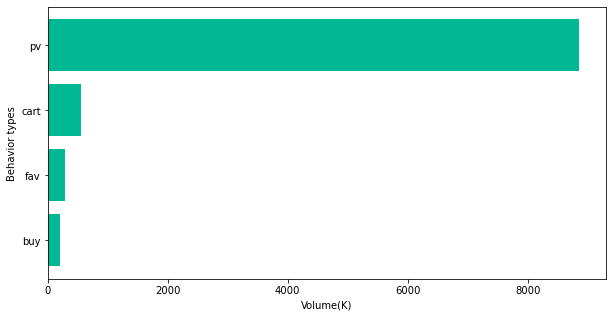

In [40]:
#Visualization 
plt.figure(figsize=(10, 5))
plt.barh(UBTV.index,UBTV.div(1000),color='#00b894')
plt.xlabel('Volume(K)')
plt.ylabel('Behavior types')
#Y轴倒序
plt.gca().invert_yaxis()
plt.show()

- The user behavior of each process is **decreasing**, and the conversion rate from click to purchase is **only 2.2%.**
- There is a lot of loss after users click on the product detail page.

### 6.2.2 Fuunel Analysis

- Conversion rate analysis of each process step, from browsing to buying
- The user may go through the following process to complete the final purchase
    1. pv -> cart -> buy
    2. pv -> fav -> buy


#### 6.2.2.1 pv -> cart -> buy
- conversion rate of each step: 
    - pv -> cart: 41%
    - cart -> buy: 30%
    - pv -> cart -> buy:7%

In [41]:
#同一个用户对同一商品既又点击又有加入购物车的行为
pv_user = df_small[df_small['Behavior type']=='pv']
cart_user = df_small[df_small['Behavior type']=='cart']
pv_cart = pd.merge(pv_user,cart_user,on=['User ID','Item ID','Category ID'])

In [42]:
#后面有x的是属于PV的，后面有Y的是属于购物车的
pv_cart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640281 entries, 0 to 640280
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   User ID          640281 non-null  int64         
 1   Item ID          640281 non-null  int64         
 2   Category ID      640281 non-null  int64         
 3   Behavior type_x  640281 non-null  object        
 4   Timestamp_x      640281 non-null  object        
 5   Date_time_x      640281 non-null  datetime64[ns]
 6   Date_x           640281 non-null  object        
 7   Time_x           640281 non-null  object        
 8   Hour_x           640281 non-null  int64         
 9   Behavior type_y  640281 non-null  object        
 10  Timestamp_y      640281 non-null  object        
 11  Date_time_y      640281 non-null  datetime64[ns]
 12  Date_y           640281 non-null  object        
 13  Time_y           640281 non-null  object        
 14  Hour_y           640

In [43]:
#筛选出pv时间早于cart时间的行为
pv_cart = pv_cart[pv_cart['Date_time_x'] < pv_cart['Date_time_y']]
pv_cart

,User ID,Item ID,Category ID,Behavior type_x,Timestamp_x,Date_time_x,Date_x,Time_x,Hour_x,Behavior type_y,Timestamp_y,Date_time_y,Date_y,Time_y,Hour_y
2,10008,4691562,2671397,pv,1511926769,2017-11-29 11:39:29,2017-11-29,11:39:29,11,cart,1512002250,2017-11-30 08:37:30,2017-11-30,08:37:30,8
3,10008,4691562,2671397,pv,1512001524,2017-11-30 08:25:24,2017-11-30,08:25:24,8,cart,1512002250,2017-11-30 08:37:30,2017-11-30,08:37:30,8
6,10009,4415618,2832009,pv,1511575640,2017-11-25 10:07:20,2017-11-25,10:07:20,10,cart,1511801511,2017-11-28 00:51:51,2017-11-28,00:51:51,0
7,10009,4415618,2832009,pv,1511673258,2017-11-26 13:14:18,2017-11-26,13:14:18,13,cart,1511801511,2017-11-28 00:51:51,2017-11-28,00:51:51,0
8,10009,4415618,2832009,pv,1511712372,2017-11-27 00:06:12,2017-11-27,00:06:12,0,cart,1511801511,2017-11-28 00:51:51,2017-11-28,00:51:51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640256,99999,3325832,2926020,pv,1512136351,2017-12-01 21:52:31,2017-12-01,21:52:31,21,cart,1512136634,2017-12-01 21:57:14,2017-12-01,21:57:14,21
640258,99999,3325832,2926020,pv,1512136447,2017-12-01 21:54:07,2017-12-01,21:54:07,21,cart,1512136634,2017-12-01 21:57:14,2017-12-01,21:57:14,21
640270,99999,2499835,2926020,pv,1511616589,2017-11-25 21:29:49,2017-11-25,21:29:49,21,cart,1512046965,2017-11-30 21:02:45,2017-11-30,21:02:45,21
640271,99999,2499835,2926020,pv,1511616859,2017-11-25 21:34:19,2017-11-25,21:34:19,21,cart,1512046965,2017-11-30 21:02:45,2017-11-30,21:02:45,21


In [44]:
#从pv到cart的转化率
len(pv_cart['User ID'].unique()) / len(df_small[df_small['Behavior type']=='pv']['User ID'].unique())

0.4107396465039133

In [45]:
#成交了的用户数据
buy_user = df_small[df_small['Behavior type']=='buy']
#既加购又购买的用户数据
cart_buy = pd.merge(cart_user,buy_user,on=['User ID','Item ID','Category ID'])
#筛选出加购时间早于购买时间的数据
cart_buy = cart_buy[cart_buy['Date_time_x'] < cart_buy['Date_time_y']]
cart_buy

,User ID,Item ID,Category ID,Behavior type_x,Timestamp_x,Date_time_x,Date_x,Time_x,Hour_x,Behavior type_y,Timestamp_y,Date_time_y,Date_y,Time_y,Hour_y
0,10008,4691562,2671397,cart,1512002250,2017-11-30 08:37:30,2017-11-30,08:37:30,8,buy,1512002442,2017-11-30 08:40:42,2017-11-30,08:40:42,8
1,10009,4945859,874415,cart,1511621209,2017-11-25 22:46:49,2017-11-25,22:46:49,22,buy,1511663418,2017-11-26 10:30:18,2017-11-26,10:30:18,10
2,10021,3201805,1958275,cart,1511992484,2017-11-30 05:54:44,2017-11-30,05:54:44,5,buy,1512101357,2017-12-01 12:09:17,2017-12-01,12:09:17,12
3,10034,2132850,149192,cart,1511598173,2017-11-25 16:22:53,2017-11-25,16:22:53,16,buy,1511707687,2017-11-26 22:48:07,2017-11-26,22:48:07,22
4,10034,2212646,2131531,cart,1511600797,2017-11-25 17:06:37,2017-11-25,17:06:37,17,buy,1511707687,2017-11-26 22:48:07,2017-11-26,22:48:07,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39162,99981,902946,4756105,cart,1512273815,2017-12-03 12:03:35,2017-12-03,12:03:35,12,buy,1512278587,2017-12-03 13:23:07,2017-12-03,13:23:07,13
39163,99982,3686275,1879194,cart,1511615228,2017-11-25 21:07:08,2017-11-25,21:07:08,21,buy,1511615957,2017-11-25 21:19:17,2017-11-25,21:19:17,21
39164,99982,4315645,1029459,cart,1512315378,2017-12-03 23:36:18,2017-12-03,23:36:18,23,buy,1512315527,2017-12-03 23:38:47,2017-12-03,23:38:47,23
39165,99987,3139118,2520771,cart,1512008712,2017-11-30 10:25:12,2017-11-30,10:25:12,10,buy,1512258956,2017-12-03 07:55:56,2017-12-03,07:55:56,7


In [46]:
#加购到购买的转化率：
len(cart_buy['User ID'].unique()) / len(df_small[df_small['Behavior type']=='cart']['User ID'].unique())

0.3002934240114079

In [47]:
#用户既点击又加购又购买的数据
pv_cart_buy = pd.merge(pv_cart,cart_buy,on=['User ID','Item ID','Category ID'])

In [48]:
pv_cart_buy

,User ID,Item ID,Category ID,Behavior type_x_x,Timestamp_x_x,Date_time_x_x,Date_x_x,Time_x_x,Hour_x_x,Behavior type_y_x,...,Date_time_x_y,Date_x_y,Time_x_y,Hour_x_y,Behavior type_y_y,Timestamp_y_y,Date_time_y_y,Date_y_y,Time_y_y,Hour_y_y
0,10008,4691562,2671397,pv,1511926769,2017-11-29 11:39:29,2017-11-29,11:39:29,11,cart,...,2017-11-30 08:37:30,2017-11-30,08:37:30,8,buy,1512002442,2017-11-30 08:40:42,2017-11-30,08:40:42,8
1,10008,4691562,2671397,pv,1512001524,2017-11-30 08:25:24,2017-11-30,08:25:24,8,cart,...,2017-11-30 08:37:30,2017-11-30,08:37:30,8,buy,1512002442,2017-11-30 08:40:42,2017-11-30,08:40:42,8
2,10034,2212646,2131531,pv,1511600357,2017-11-25 16:59:17,2017-11-25,16:59:17,16,cart,...,2017-11-25 17:06:37,2017-11-25,17:06:37,17,buy,1511707687,2017-11-26 22:48:07,2017-11-26,22:48:07,22
3,10086,2075645,965809,pv,1511962608,2017-11-29 21:36:48,2017-11-29,21:36:48,21,cart,...,2017-11-29 21:43:58,2017-11-29,21:43:58,21,buy,1511963222,2017-11-29 21:47:02,2017-11-29,21:47:02,21
4,10170,4642310,3579754,pv,1512103881,2017-12-01 12:51:21,2017-12-01,12:51:21,12,cart,...,2017-12-01 12:54:32,2017-12-01,12:54:32,12,buy,1512109923,2017-12-01 14:32:03,2017-12-01,14:32:03,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23849,99950,3321267,625430,pv,1511962321,2017-11-29 21:32:01,2017-11-29,21:32:01,21,cart,...,2017-11-30 10:25:10,2017-11-30,10:25:10,10,buy,1512094456,2017-12-01 10:14:16,2017-12-01,10:14:16,10
23850,9998,4184862,796856,pv,1511952442,2017-11-29 18:47:22,2017-11-29,18:47:22,18,cart,...,2017-11-29 18:46:03,2017-11-29,18:46:03,18,buy,1512024490,2017-11-30 14:48:10,2017-11-30,14:48:10,14
23851,99998,366267,1299190,pv,1511603606,2017-11-25 17:53:26,2017-11-25,17:53:26,17,cart,...,2017-11-30 17:37:40,2017-11-30,17:37:40,17,buy,1512113567,2017-12-01 15:32:47,2017-12-01,15:32:47,15
23852,99998,366267,1299190,pv,1511956787,2017-11-29 19:59:47,2017-11-29,19:59:47,19,cart,...,2017-11-30 17:37:40,2017-11-30,17:37:40,17,buy,1512113567,2017-12-01 15:32:47,2017-12-01,15:32:47,15


In [49]:
# 该购买路径转化率pv -> cart -> buy
len(pv_cart_buy['User ID'].unique()) / len(df_small[df_small['Behavior type']=='pv']['User ID'].unique())

0.07117607422381174

#### 6.2.2.2 pv -> fav -> buy
- conversion rate of each step: 
    - pv -> fav: 18%
    - fav -> buy: 22%
    - pv -> fav -> buy: 3%

In [50]:
#收藏行为的数据
fav_user = df_small[df_small['Behavior type']=='fav']

In [51]:
#同一用户对同一商品既点击又收藏
pv_fav = pd.merge(pv_user,fav_user,on=['User ID','Item ID','Category ID'])
pv_fav = pv_fav[pv_fav['Date_time_x'] < pv_fav['Date_time_y']]

In [52]:
pv_fav

,User ID,Item ID,Category ID,Behavior type_x,Timestamp_x,Date_time_x,Date_x,Time_x,Hour_x,Behavior type_y,Timestamp_y,Date_time_y,Date_y,Time_y,Hour_y
0,100,2971043,4869428,pv,1511550600,2017-11-25 03:10:00,2017-11-25,03:10:00,3,fav,1511565222,2017-11-25 07:13:42,2017-11-25,07:13:42,7
1,100,2971043,4869428,pv,1511550885,2017-11-25 03:14:45,2017-11-25,03:14:45,3,fav,1511565222,2017-11-25 07:13:42,2017-11-25,07:13:42,7
3,100,3763048,3425094,pv,1511551450,2017-11-25 03:24:10,2017-11-25,03:24:10,3,fav,1511551860,2017-11-25 03:31:00,2017-11-25,03:31:00,3
4,100,3245421,2881542,pv,1511684245,2017-11-26 16:17:25,2017-11-26,16:17:25,16,fav,1511742273,2017-11-27 08:24:33,2017-11-27,08:24:33,8
5,100,3245421,2881542,pv,1511704155,2017-11-26 21:49:15,2017-11-26,21:49:15,21,fav,1511742273,2017-11-27 08:24:33,2017-11-27,08:24:33,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266863,99998,2679503,2131531,pv,1511830407,2017-11-28 08:53:27,2017-11-28,08:53:27,8,fav,1511830422,2017-11-28 08:53:42,2017-11-28,08:53:42,8
266870,99998,1917301,2355072,pv,1512189915,2017-12-02 12:45:15,2017-12-02,12:45:15,12,fav,1512190058,2017-12-02 12:47:38,2017-12-02,12:47:38,12
266872,99998,3301861,1080785,pv,1512190141,2017-12-02 12:49:01,2017-12-02,12:49:01,12,fav,1512190165,2017-12-02 12:49:25,2017-12-02,12:49:25,12
266873,99998,3845720,3607361,pv,1512190223,2017-12-02 12:50:23,2017-12-02,12:50:23,12,fav,1512190255,2017-12-02 12:50:55,2017-12-02,12:50:55,12


In [53]:
#点击到收藏的转化率
len(pv_fav['User ID'].unique()) / len(df_small[df_small['Behavior type']=='pv']['User ID'].unique())

0.18297828227854662

In [54]:
#同一用户对同一商品既收藏又购买
fav_buy = pd.merge(fav_user, buy_user, on=['User ID','Item ID','Category ID'])
fav_buy = fav_buy[fav_buy['Date_time_x']<fav_buy['Date_time_y']]
fav_buy

,User ID,Item ID,Category ID,Behavior type_x,Timestamp_x,Date_time_x,Date_x,Time_x,Hour_x,Behavior type_y,Timestamp_y,Date_time_y,Date_y,Time_y,Hour_y
0,100,2971043,4869428,fav,1511565222,2017-11-25 07:13:42,2017-11-25,07:13:42,7,buy,1511617549,2017-11-25 21:45:49,2017-11-25,21:45:49,21
1,10024,4685098,1936748,fav,1512009807,2017-11-30 10:43:27,2017-11-30,10:43:27,10,buy,1512047271,2017-11-30 21:07:51,2017-11-30,21:07:51,21
2,10027,1904046,3988258,fav,1511571918,2017-11-25 09:05:18,2017-11-25,09:05:18,9,buy,1511676076,2017-11-26 14:01:16,2017-11-26,14:01:16,14
3,10086,2140162,965809,fav,1511931152,2017-11-29 12:52:32,2017-11-29,12:52:32,12,buy,1511963222,2017-11-29 21:47:02,2017-11-29,21:47:02,21
4,10111,3336653,2885642,fav,1511857558,2017-11-28 16:25:58,2017-11-28,16:25:58,16,buy,1511857761,2017-11-28 16:29:21,2017-11-28,16:29:21,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,99718,62401,4159072,fav,1512288047,2017-12-03 16:00:47,2017-12-03,16:00:47,16,buy,1512288075,2017-12-03 16:01:15,2017-12-03,16:01:15,16
13970,99800,3070196,3160926,fav,1511613348,2017-11-25 20:35:48,2017-11-25,20:35:48,20,buy,1511703088,2017-11-26 21:31:28,2017-11-26,21:31:28,21
13971,99864,595066,4145813,fav,1512220446,2017-12-02 21:14:06,2017-12-02,21:14:06,21,buy,1512224603,2017-12-02 22:23:23,2017-12-02,22:23:23,22
13972,99864,3042900,4181361,fav,1512226904,2017-12-02 23:01:44,2017-12-02,23:01:44,23,buy,1512262182,2017-12-03 08:49:42,2017-12-03,08:49:42,8


In [55]:
#收藏到购买的转化率
len(fav_buy['User ID'].unique()) / len(df_small[df_small['Behavior type']=='fav']['User ID'].unique())

0.21840526164085633

In [56]:
#从点击到收藏到购买的转化率
pv_fav_buy = pd.merge(pv_fav,fav_buy,on=['User ID','Item ID','Category ID'])
pv_fav_buy

,User ID,Item ID,Category ID,Behavior type_x_x,Timestamp_x_x,Date_time_x_x,Date_x_x,Time_x_x,Hour_x_x,Behavior type_y_x,...,Date_time_x_y,Date_x_y,Time_x_y,Hour_x_y,Behavior type_y_y,Timestamp_y_y,Date_time_y_y,Date_y_y,Time_y_y,Hour_y_y
0,100,2971043,4869428,pv,1511550600,2017-11-25 03:10:00,2017-11-25,03:10:00,3,fav,...,2017-11-25 07:13:42,2017-11-25,07:13:42,7,buy,1511617549,2017-11-25 21:45:49,2017-11-25,21:45:49,21
1,100,2971043,4869428,pv,1511550885,2017-11-25 03:14:45,2017-11-25,03:14:45,3,fav,...,2017-11-25 07:13:42,2017-11-25,07:13:42,7,buy,1511617549,2017-11-25 21:45:49,2017-11-25,21:45:49,21
2,10111,3336653,2885642,pv,1511857241,2017-11-28 16:20:41,2017-11-28,16:20:41,16,fav,...,2017-11-28 16:25:58,2017-11-28,16:25:58,16,buy,1511857761,2017-11-28 16:29:21,2017-11-28,16:29:21,16
3,10154,3847051,3430419,pv,1511612104,2017-11-25 20:15:04,2017-11-25,20:15:04,20,fav,...,2017-11-25 20:53:01,2017-11-25,20:53:01,20,buy,1511615884,2017-11-25 21:18:04,2017-11-25,21:18:04,21
4,10608,4453719,4813803,pv,1511609071,2017-11-25 19:24:31,2017-11-25,19:24:31,19,fav,...,2017-11-25 19:42:58,2017-11-25,19:42:58,19,buy,1512218966,2017-12-02 20:49:26,2017-12-02,20:49:26,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,99451,4350582,149192,pv,1511585658,2017-11-25 12:54:18,2017-11-25,12:54:18,12,fav,...,2017-11-25 13:40:17,2017-11-25,13:40:17,13,buy,1512017217,2017-11-30 12:46:57,2017-11-30,12:46:57,12
5969,99451,4350582,149192,pv,1511585754,2017-11-25 12:55:54,2017-11-25,12:55:54,12,fav,...,2017-11-25 13:40:17,2017-11-25,13:40:17,13,buy,1512017217,2017-11-30 12:46:57,2017-11-30,12:46:57,12
5970,99718,62401,4159072,pv,1512287938,2017-12-03 15:58:58,2017-12-03,15:58:58,15,fav,...,2017-12-03 16:00:47,2017-12-03,16:00:47,16,buy,1512288075,2017-12-03 16:01:15,2017-12-03,16:01:15,16
5971,99867,2999376,4756105,pv,1511591932,2017-11-25 14:38:52,2017-11-25,14:38:52,14,fav,...,2017-11-27 20:02:07,2017-11-27,20:02:07,20,buy,1511853498,2017-11-28 15:18:18,2017-11-28,15:18:18,15


In [57]:
#pv->fav->buy的转化率
len(pv_fav_buy['User ID'].unique()) / len(df_small[df_small['Behavior type']=='pv']['User ID'].unique())

0.02608199865236096

In [58]:
# pv_fav_cart_buy = pd.merge(pv_fav_buy,pv_cart_buy,on=['User ID','Item ID','Category ID','Date_time_y_y'])
# pv_fav_cart_buy

- conversion rate of each step: 
    - pv -> cart: 41%
    - cart -> buy: 30%
    - pv -> cart -> buy: 7%
- conversion rate of each step: 
    - pv -> fav: 18%
    - fav -> buy: 22%
    - pv -> fav -> buy: 3%
- From the above data, the following conclusions can be drawn.
    1. Guesses as to why users add cart but do not buy.
        1. **May want to compare the others.**
        2. **Just when ‘double twelve’ preheating activities, want to wait for the cheapest time to buy.**
        3. **Wait to see if they can get a Price-break discount.**
        4. **Put on a few days to buy.**
    2. The same reason why the user did not buy after favourite.
    3. The **conversion rate of users buying after adding cart(30%) is higher than** the **conversion rate of buying after favourite (22%)**, indicating that users are **more inclined to shopping cart purchase**. The guess is that there is a direct order button after adding cart, which is easier to guide users to buy. And after favourite, you need to click into the product detail page again to buy, and this step will cause some users to lose.

In [59]:
# - 从上面的数据可以得出以下结论：
#     1. 用户加购后却没有购买的原因猜测：
#         1. 可能想货比三家。
#         2. 正值双十二预热活动，想等最便宜的时候买。
#         3. 等看看能不能凑单满减。
#         4. 放着过几天再买。
#     2. 用户收藏后却没有购买的原因同理。
#     3. 用户加购后购买的转化率(30%)比收藏后购买的转化率(22%)高，说明用户更倾向于购物车购买。猜测是加购后有直接下单的按钮，更容易引导用户购买。而收藏后需要再次点进商品详情页才能购买，这个步骤会造成部分用户流失。

## 6.3 Analysis of Product Sales
- corresponds to 2.3 商品情况分析

### 6.3.1 Analysis of the trading volume by date
    - 后期改进：应该再加上同x轴的点击、加购、收藏数量的折线对比

In [60]:
TV_by_date = df_small[df_small['Behavior type']=='buy']['Behavior type'].groupby(df_small['Date']).count()
TV_by_date

Date
2017-11-25    19465
2017-11-26    20094
2017-11-27    21678
2017-11-28    20392
2017-11-29    21618
2017-11-30    21294
2017-12-01    20836
2017-12-02    25066
2017-12-03    25049
Name: Behavior type, dtype: int64

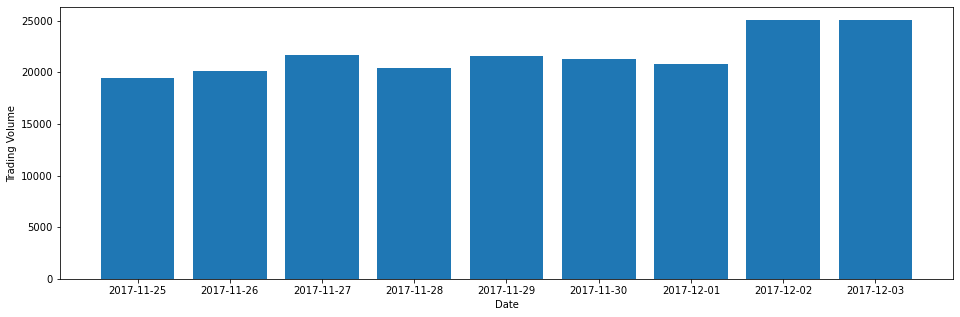

In [61]:
plt.figure(figsize=(16,5))
x = TV_by_date.index
y = TV_by_date
plt.bar(x,y)
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()

- The **higher turnover number on December 3 and December 2** just came on Saturday and Sunday. People have more free time on weekends, so the number of turnover is higher.

### 6.3.2 Repurchase Rate
- 复购率=购买2次及以上用户数/总购买用户数
- **Repurchase Rate = 66%**

In [62]:
#判断哪些用户购买2次及以上
#如果购买了两次以上就会返回True，没有就会返回False
temp = df_small[df_small['Behavior type']=='buy'].groupby(df_small['User ID']).count() >= 2
#只取返回True的数据
minTwiceBuy = temp[temp['Behavior type'] == True]
minTwiceBuy

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour
User ID,,,,,,,,,
2,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
16,True,True,True,True,True,True,True,True,True
25,True,True,True,True,True,True,True,True,True
27,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
99989,True,True,True,True,True,True,True,True,True
99993,True,True,True,True,True,True,True,True,True
99995,True,True,True,True,True,True,True,True,True


In [63]:
#复购率
repuchase_rate =  len(minTwiceBuy) / len(df_small[df_small['Behavior type']=='buy']['User ID'].unique())
repuchase_rate

0.6564761325630891

- The repurchase rate shows that **more than half of the users have repurchase behavior**, indicating that Taobao are attractive enough for users to have enough loyalty.
- For the loyal customers need to build a perfect user information database to record their shopping.

In [64]:
#- 从复购率可以看出，一半以上的用户有复购行为，说明淘宝/商品对用户有足够的吸引力，让用户有足够忠诚度。
#- 对于忠实的客户需要建立完善的用户信息资料库，记录他们的购物情况。
#- 更详细的用户行为分析参考：http://www.woshipm.com/user-research/3661625.html

### 6.3.3 Venn diagram

In [65]:
#被点击最多的前十商品
most_item_pv = df_small[df_small['Behavior type']=='pv']['Item ID'].value_counts()
most_item_pv.head(10)

812879     3246
3845720    2630
2331370    2042
2032668    2011
138964     2006
4211339    1891
1535294    1872
3031354    1858
2338453    1802
59883      1796
Name: Item ID, dtype: int64

In [66]:
#被收藏最多的前十商品
most_item_fav = df_small[df_small['Behavior type']=='fav']['Item ID'].value_counts()
most_item_fav.head(10)

2279428    102
2331370     97
812879      90
3845720     84
2364679     83
2818406     82
3330337     82
138964      73
1583704     64
3031354     64
Name: Item ID, dtype: int64

In [67]:
#被加购最多的前十商品
most_item_cart = df_small[df_small['Behavior type']=='cart']['Item ID'].value_counts()
most_item_cart.head(10)

3031354    174
812879     170
2331370    170
2818406    150
2560262    150
1583704    140
1535294    122
4211339    108
1444258    102
1402604     97
Name: Item ID, dtype: int64

In [68]:
#被购买最多的前十商品
most_item_buy = df_small[df_small['Behavior type']=='buy']['Item ID'].value_counts()
most_item_buy.head(10)

3122135    130
3031354     97
2560262     86
2964774     61
4219087     55
3964583     52
2955846     52
3189426     52
1744531     50
1910706     48
Name: Item ID, dtype: int64

In [69]:
most_item_buy_set = set(most_item_buy.head(10).index)
most_item_buy_set

{1744531,
 1910706,
 2560262,
 2955846,
 2964774,
 3031354,
 3122135,
 3189426,
 3964583,
 4219087}

In [70]:
most_item_pv_set = set(most_item_pv.head(10).index)
most_item_pv_set

{59883,
 138964,
 812879,
 1535294,
 2032668,
 2331370,
 2338453,
 3031354,
 3845720,
 4211339}

In [71]:
most_item_fav_set = set(most_item_pv.head(10).index)
most_item_fav_set

{59883,
 138964,
 812879,
 1535294,
 2032668,
 2331370,
 2338453,
 3031354,
 3845720,
 4211339}

In [72]:
most_item_cart_set = set(most_item_pv.head(10).index)
most_item_cart_set

{59883,
 138964,
 812879,
 1535294,
 2032668,
 2331370,
 2338453,
 3031354,
 3845720,
 4211339}

In [73]:
import sys
#pyvenn: Venn diagrams for 2, 3, 4, 5, 6 sets
from venn import venn
#[most_item_pv.head(10), most_item_fav.index, most_item_cart.index, most_item_buy.index]

In [74]:
combine_venn_set = {
    'most_item_pv_set':most_item_pv_set,
    'most_item_fav_set':most_item_fav_set,
    'most_item_cart_set':most_item_cart_set,
    'most_item_buy_set':most_item_buy_set
}

<AxesSubplot:>

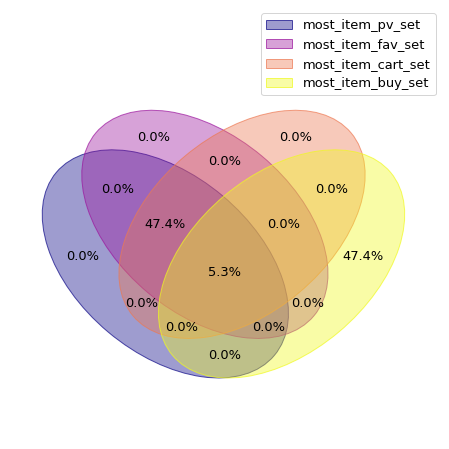

In [75]:
# labels = venn.get_labels([most_item_pv_set,most_item_buy_set],
#                          fill=['number', 'logic','percent'])
# fig, ax = venn.venn2(labels)
# fig.show()
venn(combine_venn_set, fmt='{percentage:.1f}%',cmap="plasma")

- From the Venn diagram of the four, we can see that **the top ten 'click', 'cart' and 'fav' items have a high overlap (47.4%)**, but the overlap between the **top ten 'buy' items and the other three categories is only 5.3%**. This means that although this part of the item can attract users but **the purchase conversion rate is relatively low**. There is space to improve the conversion rate of this part of the goods.

In [76]:
#- 从四者韦恩图可以看出，前十名点击、加购和收藏重合的商品有较高重合度（47.4%），但购买量前十的商品与其他三类的重合度却仅有5.3%。
# 说明这部分商品虽然能吸引用户但购买转化率却比较低。这部分商品的转化率有提高的空间。

### 6.4 Basic RFM Model
    - corresponds to 2.4 RFM分析
    - R(Recency),F(Frequency),M(Monetary)
    - R：最近一次消費意指上一次購買的時候。反映用戶對產品的態度，關乎用戶留存。
        - 當天的日期（或自定） - 每個客戶最後一次交易的日期（max('date')） = 客戶最後一次交易距離天數
    - F：消費頻率是用戶在限定的期間內所購買的次數。反應顧客的忠誠度。
        - 一周內的‘buy’的次數。
    - M: 消費金額。反映用戶的價值。數據源中沒有該類數據。

In [77]:
# 可以參考的tableau建立RFM的例子：https://www.zhihu.com/question/49439948

#### 6.4.1 Recency
    - 把12月3日設置為參考日期，以距離12月3日的天數劃分區間，其中0-2天，3-4天，5-6天，7-8天分別對應4，3，2，1分。

In [78]:
import datetime

In [79]:
#計算上次購買距離12月3日的天數
#dateime的用法
R_days = df_small[df_small['Behavior type']=='buy'].copy()
#map(lambda x: x.days)把結尾的days消除
R_days['Buy Days'] = (datetime.date(2017,12,3)- R_days['Date']).map(lambda x: x.days)
R_days

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour,Buy Days
71,100,1603476,2951233,buy,1511579908,2017-11-25 11:18:28,2017-11-25,11:18:28,11,8
73,100,2971043,4869428,buy,1511617549,2017-11-25 21:45:49,2017-11-25,21:45:49,21,8
100,100,598929,2429887,buy,1511759458,2017-11-27 13:10:58,2017-11-27,13:10:58,13,6
119,100,1046201,3002561,buy,1511767298,2017-11-27 15:21:38,2017-11-27,15:21:38,15,6
125,100,1606258,4098232,buy,1511789940,2017-11-27 21:39:00,2017-11-27,21:39:00,21,6
...,...,...,...,...,...,...,...,...,...,...
100149426,99998,2181289,4643350,buy,1511603337,2017-11-25 17:48:57,2017-11-25,17:48:57,17,8
100149435,99998,366267,1299190,buy,1511603724,2017-11-25 17:55:24,2017-11-25,17:55:24,17,8
100149461,99998,2262524,4357323,buy,1511828070,2017-11-28 08:14:30,2017-11-28,08:14:30,8,5
100149570,99998,366267,1299190,buy,1512113567,2017-12-01 15:32:47,2017-12-01,15:32:47,15,2


In [80]:
#給R天數設置區間：
def R_score(x):
    if x in [0,1,2]:
        return 4
    elif x in [3,4]:
        return 3
    elif x in [5,6]:
        return 2
    else:
        return 1
R_days['R_score']=R_days['Buy Days'].map(lambda x: R_score(x))
R_days.head(20)
    

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour,Buy Days,R_score
71,100,1603476,2951233,buy,1511579908,2017-11-25 11:18:28,2017-11-25,11:18:28,11,8,1
73,100,2971043,4869428,buy,1511617549,2017-11-25 21:45:49,2017-11-25,21:45:49,21,8,1
100,100,598929,2429887,buy,1511759458,2017-11-27 13:10:58,2017-11-27,13:10:58,13,6,2
119,100,1046201,3002561,buy,1511767298,2017-11-27 15:21:38,2017-11-27,15:21:38,15,6,2
125,100,1606258,4098232,buy,1511789940,2017-11-27 21:39:00,2017-11-27,21:39:00,21,6,2
126,100,4840649,1029459,buy,1511790130,2017-11-27 21:42:10,2017-11-27,21:42:10,21,6,2
128,100,251391,3738615,buy,1511790782,2017-11-27 21:53:02,2017-11-27,21:53:02,21,6,2
136,100,4075065,2881542,buy,1511833877,2017-11-28 09:51:17,2017-11-28,09:51:17,9,5,2
18371,10008,1695628,3834955,buy,1511741533,2017-11-27 08:12:13,2017-11-27,08:12:13,8,6,2
18386,10008,4691562,2671397,buy,1512002442,2017-11-30 08:40:42,2017-11-30,08:40:42,8,3,3


In [81]:
#購買行為下的獨立用戶數
R_days['User ID'].nunique()

65780

In [82]:
#只記錄最高的R_score分數.
#排序之後drop_duplicates就能保留第一個數據
R_days_sort = R_days.sort_values(by=['R_score'],ascending = False).drop_duplicates('User ID')
R_days_sort

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour,Buy Days,R_score
50087945,54409,1801491,3430419,buy,1512284956,2017-12-03 15:09:16,2017-12-03,15:09:16,15,0,4
44655829,2991,1421109,3596683,buy,1512275637,2017-12-03 12:33:57,2017-12-03,12:33:57,12,0,4
44709462,30134,2071656,374584,buy,1512176955,2017-12-02 09:09:15,2017-12-02,09:09:15,9,1,4
44709086,30133,4397050,3738615,buy,1512104307,2017-12-01 12:58:27,2017-12-01,12:58:27,12,2,4
44705689,30116,1435963,2576484,buy,1512118480,2017-12-01 16:54:40,2017-12-01,16:54:40,16,2,4
...,...,...,...,...,...,...,...,...,...,...,...
55457601,79230,3805801,1575622,buy,1511597304,2017-11-25 16:08:24,2017-11-25,16:08:24,16,8,1
55498725,79420,986402,2885642,buy,1511583948,2017-11-25 12:25:48,2017-11-25,12:25:48,12,8,1
55528389,79555,609266,181182,buy,1511671133,2017-11-26 12:38:53,2017-11-26,12:38:53,12,7,1
55514785,79485,2149765,1575622,buy,1511679964,2017-11-26 15:06:04,2017-11-26,15:06:04,15,7,1


In [83]:
#不同R_score的用戶數統計
R_days_sort['R_score'].value_counts()

4    37669
3    13132
2     8758
1     6221
Name: R_score, dtype: int64

#### 6.4.2 Frequency
- 对应Recency，所以同样分成四组。

In [84]:
#算出购买次数最多的用户对应的次数：
user_rebuy_count = df_small[df_small['Behavior type']=='buy']['User ID'].value_counts()
user_rebuy_count.max()

78

In [85]:
#最多一个用户购买78次，所以从1-78分成4组。
def F_score(x):
    if x in range(58,79):
        return 4
    elif x in range(38,58):
        return 3
    elif x in range(18,38):
        return 2
    else:
        return 1

In [86]:
#变成df形式后resest index，让index变成0，1，2，3等等。
#之后需要重新命名列名，index变成user id, user id变成购买次数
#再把user id设成index
user_rebuy_count = user_rebuy_count.to_frame().reset_index().rename(columns={'index':'User ID','User ID':'Buy_count'}).set_index(['User ID'])
user_rebuy_count

,Buy_count
User ID,
98084,78
92448,72
9610,67
78030,65
99904,55
...,...
24971,1
69626,1
76566,1


In [87]:
user_rebuy_count['F_score']=user_rebuy_count['Buy_count'].map(lambda x: F_score(x))
user_rebuy_count

,Buy_count,F_score
User ID,,
98084,78,4
92448,72,4
9610,67,4
78030,65,4
99904,55,3
...,...,...
24971,1,1
69626,1,1
76566,1,1


In [88]:
#不同F得分的用户数
user_rebuy_count['F_score'].value_counts()

1    65492
2      265
3       19
4        4
Name: F_score, dtype: int64

In [89]:
final_RFM = R_days_sort.merge(user_rebuy_count,on='User ID')
final_RFM

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour,Buy Days,R_score,Buy_count,F_score
0,54409,1801491,3430419,buy,1512284956,2017-12-03 15:09:16,2017-12-03,15:09:16,15,0,4,1,1
1,2991,1421109,3596683,buy,1512275637,2017-12-03 12:33:57,2017-12-03,12:33:57,12,0,4,10,1
2,30134,2071656,374584,buy,1512176955,2017-12-02 09:09:15,2017-12-02,09:09:15,9,1,4,1,1
3,30133,4397050,3738615,buy,1512104307,2017-12-01 12:58:27,2017-12-01,12:58:27,12,2,4,2,1
4,30116,1435963,2576484,buy,1512118480,2017-12-01 16:54:40,2017-12-01,16:54:40,16,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65775,79230,3805801,1575622,buy,1511597304,2017-11-25 16:08:24,2017-11-25,16:08:24,16,8,1,1,1
65776,79420,986402,2885642,buy,1511583948,2017-11-25 12:25:48,2017-11-25,12:25:48,12,8,1,2,1
65777,79555,609266,181182,buy,1511671133,2017-11-26 12:38:53,2017-11-26,12:38:53,12,7,1,1,1
65778,79485,2149765,1575622,buy,1511679964,2017-11-26 15:06:04,2017-11-26,15:06:04,15,7,1,1,1


#### 6.4.3 RFM User Level
- 分别求出R、F评分的平均值，之后就每位用户的R、F评分进行比较。高于平均值则高，反之低。
- 简单分为四类：
    - R高F高：高价值用户（最近购买且购买频率高）
    - R高F低：重点发展用户（最近购买但购买频率低）（个人理解：继续发展让用户能够高频率购买）
    - R低F高：重点保持用户（最近少购买但购买频率高）（个人理解：保持住用户的高频率购买）
    - R低F低：一般价值用户

In [90]:
R_mean = final_RFM['R_score'].mean()
R_mean

3.2503648525387656

In [91]:
F_mean = final_RFM['F_score'].mean()
F_mean

1.0047886895712983

In [92]:
f1 = final_RFM[['R_score','F_score']]
f1

,R_score,F_score
0,4,1
1,4,1
2,4,1
3,4,1
4,4,1
...,...,...
65775,1,1
65776,1,1
65777,1,1
65778,1,1


In [93]:
def RFM_category(r,f):
    if r >= R_mean and f >= F_mean:    #高价值用户
        return 'High Value'
    elif r >= R_mean and f < F_mean:    #重要发展用户
        return 'Key Development'
    elif r < R_mean and f >= F_mean:    #重要保持用户
        return 'Key Contact'
    else:
        return 'General Value'    #一般价值用户

In [94]:
#不是series之后不能向上面一样用map，只能用apply/applymap
final_RFM['RFM'] = final_RFM[['R_score','F_score']].apply(lambda x:RFM_category(x[0],x[1]),axis=1)

In [95]:
final_RFM['RFM']

0        Key Development
1        Key Development
2        Key Development
3        Key Development
4        Key Development
              ...       
65775      General Value
65776      General Value
65777      General Value
65778      General Value
65779      General Value
Name: RFM, Length: 65780, dtype: object

In [96]:
final_RFM[final_RFM['RFM']=='High Value']

,User ID,Item ID,Category ID,Behavior type,Timestamp,Date_time,Date,Time,Hour,Buy Days,R_score,Buy_count,F_score,RFM
66,30575,4150493,3941877,buy,1512298823,2017-12-03 19:00:23,2017-12-03,19:00:23,19,0,4,24,2,High Value
308,32013,3287378,380289,buy,1512205350,2017-12-02 17:02:30,2017-12-02,17:02:30,17,1,4,18,2,High Value
343,30796,571131,2158079,buy,1512220658,2017-12-02 21:17:38,2017-12-02,21:17:38,21,1,4,34,2,High Value
362,3135,3027064,4731191,buy,1512275527,2017-12-03 12:32:07,2017-12-03,12:32:07,12,0,4,24,2,High Value
418,26324,3825027,1474371,buy,1512232883,2017-12-03 00:41:23,2017-12-03,00:41:23,0,0,4,25,2,High Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36935,79366,803044,1464116,buy,1512312572,2017-12-03 22:49:32,2017-12-03,22:49:32,22,0,4,39,3,High Value
36964,20910,692610,1320293,buy,1512119360,2017-12-01 17:09:20,2017-12-01,17:09:20,17,2,4,19,2,High Value
37288,25216,387171,4882154,buy,1512298186,2017-12-03 18:49:46,2017-12-03,18:49:46,18,0,4,18,2,High Value
37317,14252,768088,2042400,buy,1512309277,2017-12-03 21:54:37,2017-12-03,21:54:37,21,0,4,20,2,High Value


In [97]:
final_RFM['RFM'].value_counts()

Key Development    37411
General Value      28081
High Value           258
Key Contact           30
Name: RFM, dtype: int64

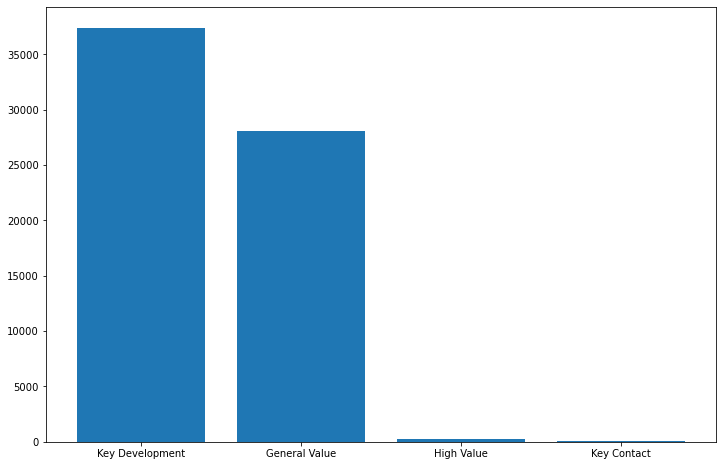

In [98]:
plt.figure(figsize=(12,8))
x = final_RFM['RFM'].value_counts().index
y = final_RFM['RFM'].value_counts()
plt.bar(x,y)
plt.show()

# 7. Conclusions and Recommendations

## 7.1 Conclusions

1. The data from November 25 to December 3 shows that Taobao has a low bounce rate and a high user repurchase rate, indicating that **Taobao has a good retention effect for users.**
2. From December 2 to December 3, there was a significant increase compared to the previous five days, which can be presumed that **users have more free time on weekends or there are related activities on weekends.**
3. User traffic during the day:
   - Users **from 1:00 to 6:00 have less browsing time** because most people are resting. 
   - **From 7:00 - 13:00 and 00:00 to 1:00**, **a lot of users open the app but do not browse much items**, guessing that they use the fragements of time to open the app. 
   - And users **have more time to browse** the items **from 19:00 to 23:00**. 
   - **The trading volume reach the peak from 20:00 to 22:00.**
4. The **conversion rate from users visit the page to users buy items is too low(2.2%)**. **Add items to cart can highly improve** the conversion rate, and it is **higher than** the conversion rate of **users favorite and then buy.**
5. Nearly half of the top ten items in terms of clicks, favorites and cart are the same(**47.4%**), but only one (**5.3%**) appears in the top ten list of trading volume.
6. According to the RFM model analysis, we can know that the **percentage of high-value users is very low**. **Key development users and general value users make up the vast majority.**
7. In general, Taobao has a **high user retention rate** and a **high item repurchase rate**, but **few high-value users**, **low user purchase frequency**, **conversion rate of nighttime clicks** and **conversion rate of hot search items need to be improved.**

## 7.2 Recommendations

1. **For User Management**
    - Vendors
        - Can create a **fan user group for hot selling products** and implement more accurate crowd management. (Private domain traffic)
        - On weekends or every day **from 19:00 to 23:00 to hold activities to promote or live to improve product offers**,  can effectively improve exposure and get more traffic.
    - Taobao
        - Build a more **detailed user database for high value users and loyal users with a high number of repurchases**, and push more accurate sales solutions for their buying preferences.
        - According to the RFM model analysis of the type of users, to **carry out targeted and accurate marketing.**   
2. **For Volume and Conversion Rate Increase.**
    - Compared to the conversion rate of users buying after favoriting and buying directly after clicking, the conversion rate of users buying after adding to cart is quite high.
    - Taobao
        - can **add more button for users to add items to the shopping cart**, such as adding a button to add items to the shopping cart on the favorite page.
        - can **use coupons or "limited time order discount" to promote the user to accelerate the purchase.** The same applies to favorite optimization.
    - Vendors
        - can **add a special offer for adding items to the shopping cart** to increase the rate of users add items to cart.
        - In addition to 20:00 to 22:00, **the volume of trading from 10:00 to 15:00 is also high**, so if there are activities to increase the volume of trading can be strated during this time.

In [99]:
# 1. 用户管理：
#     - 商家
#         - 可以对热卖的商品可以建立粉丝客户群，实行更精准的人群管理。（私域流量）
#         - 在周末或者每天的19点到23点做活动推广或者直播提高商品优惠，可以有效提高曝光度，获得更多流量。
#     - 淘宝
#         - 对复购次数多，高价值的忠实用户建立更详细的用户数据库，针对用户的购买喜好推送更精准的销售方案。
#         - 按照RFM模型分析出的用户类型，进行针对性的精准营销。
# 2. 成交量和转化率提高：
#     - 比起用户收藏后购买和点击后直接购买的转化率，用户加购后的购买转化率要高不少。
#     - 淘宝
#         - 可以增加用户将商品加入购物车的按钮，比如在收藏页面增加一个将商品加入购物车的按钮。
#         - 用户加购后可以用赠送优惠券或者是采取"限时下单折扣"的做法促进用户加速购买。收藏后的优化同理。
#     - 商家
#         - 可以适当添加加购优惠，提高用户加购率。
#         - 除了20点到22点以外，10点到15点的成交量也较高，如果有提高成交量的活动可以在这个时间段就开始举办。        